In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
MC = pd.read_csv('/Users/vaibhavgaurdeveloper/Downloads/Mall_Customers.csv')

In [4]:
print(MC.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
MC_1 = pd.get_dummies(MC)

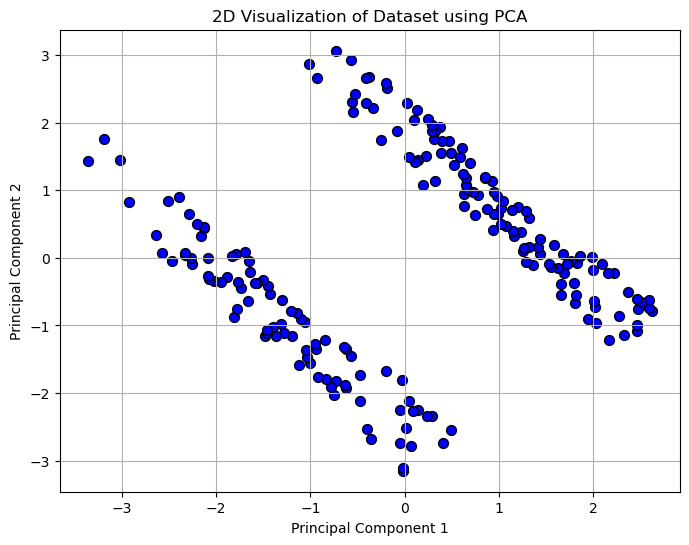

In [10]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(MC_1)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA Result
pca_MC = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Visualize Data
plt.figure(figsize=(8, 6))
plt.scatter(pca_MC['PC1'], pca_MC['PC2'], c='blue', edgecolor='k', s=50)
plt.title('2D Visualization of Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


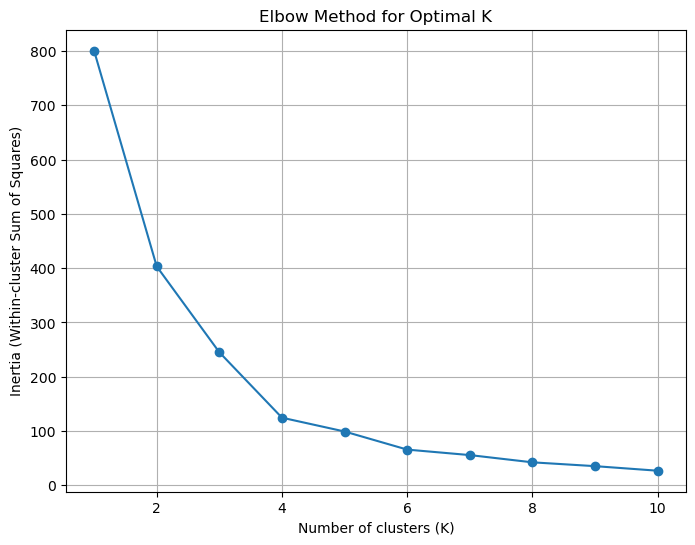

In [12]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()



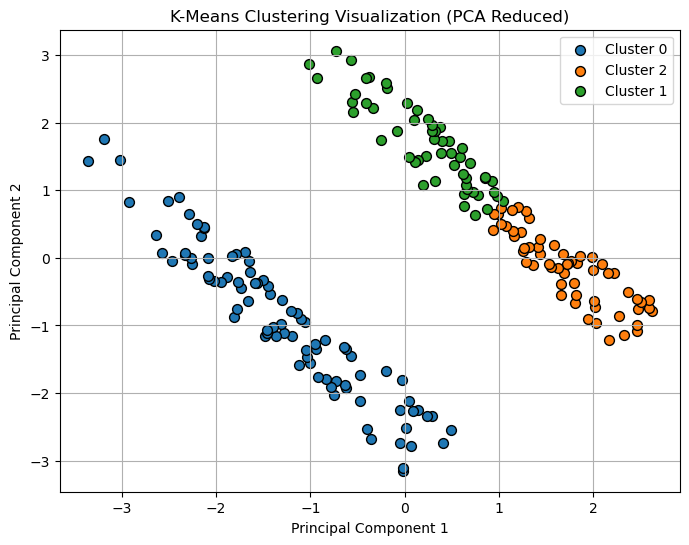

In [14]:
# Fit K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
cluster_labels = kmeans.fit_predict(pca_data)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in pca_df['Cluster'].unique():
    clustered_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(clustered_data['PC1'], clustered_data['PC2'], label=f'Cluster {cluster}', edgecolor='k', s=50)

plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Evaluate clustering using Silhouette Score
score = silhouette_score(pca_data, cluster_labels)
# Print the Silhouette Score
print(f"Silhouette Score for K-Means clustering with 3 clusters: {score:.4f}")

Silhouette Score for K-Means clustering with 3 clusters: 0.5159
